In [1]:

# Support Vector Machine (SVM) for classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('data/climate_change_and_conservative_subreddit_comments_vectorized.csv')
data

,able,abruptly,accelerating,according,account,accurate,actually,adapt,add,affordable,...,year today,year uptic,year worry,yec,yec graph,yes,yes doe,yes earth,yes man,label
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,climatechange
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,climatechange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,conservative


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

climatechange       0.00      0.00      0.00        22
 conservative       0.45      1.00      0.62        18

     accuracy                           0.45        40
    macro avg       0.23      0.50      0.31        40
 weighted avg       0.20      0.45      0.28        40

[[ 0 22]
 [ 0 18]]


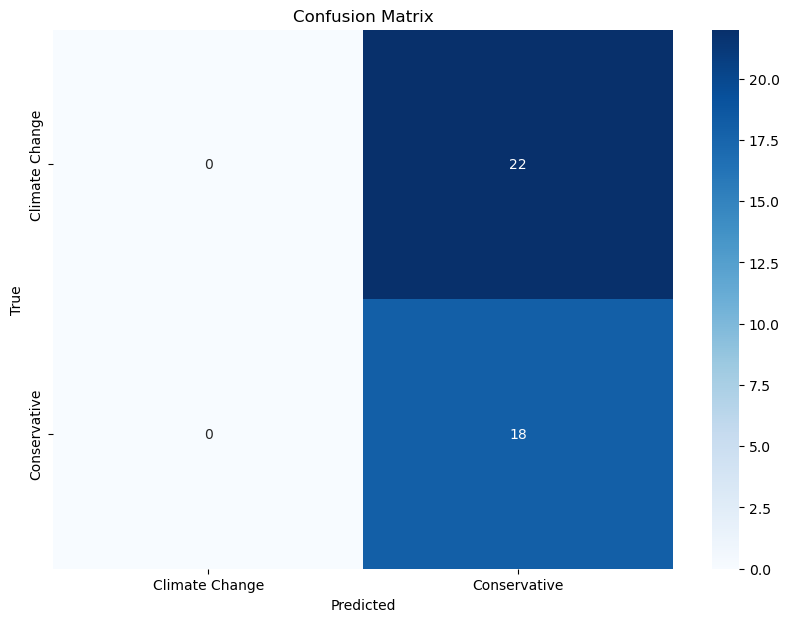

label
climatechange    100
conservative     100
Name: count, dtype: int64


In [2]:
## SVM


#Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the data into features and target variable
X = data.drop('label', axis=1)
y = data['label']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a SVM classifier
svm = SVC(
    kernel='rbf',  # Linear kernel
    C=.10,            # Regularization parameter
    gamma='scale',     # Kernel coefficient
)
# Train the classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Climate Change', 'Conservative'], yticklabels=['Climate Change', 'Conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(y.value_counts())


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly'],
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
svm_best = grid.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

               precision    recall  f1-score   support

climatechange       0.06      0.05      0.05        21
 conservative       0.09      0.11      0.10        19

     accuracy                           0.07        40
    macro avg       0.07      0.08      0.07        40
 weighted avg       0.07      0.07      0.07        40

[[ 1 20]
 [17  2]]


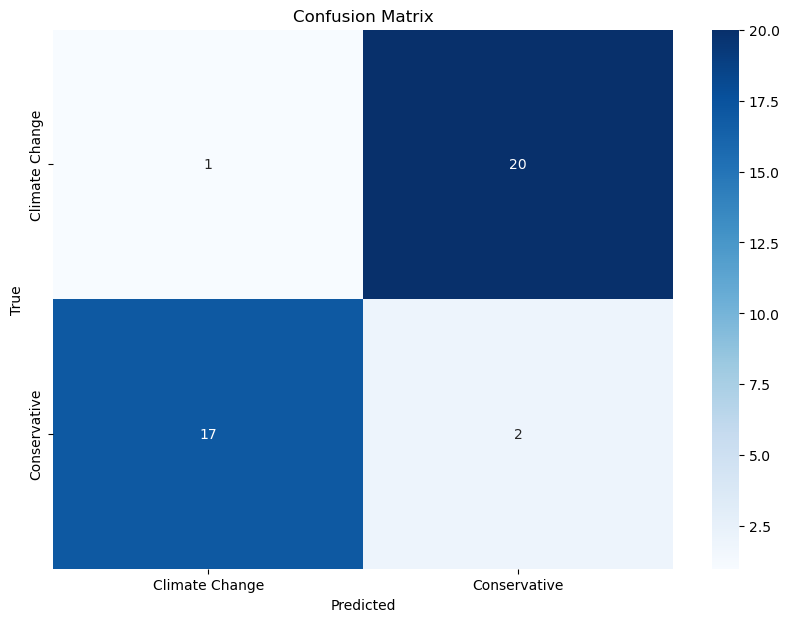

label
climatechange    100
conservative     100
Name: count, dtype: int64


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("data/climate_change_and_conservative_subreddit_comments.csv")

# Rebuild X using the original raw text data (assumed to be in `df['body']`)
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(df['body'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
svm = SVC(
    kernel='linear',  # Linear kernel
    C=1.0,            # Regularization parameter
    gamma='scale',     # Kernel coefficient
)
# Train the classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Climate Change', 'Conservative'], yticklabels=['Climate Change', 'Conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(y.value_counts())


In [24]:
### Sentiment Analysis with SVM

import json
with open("data/climate_reddit_comments_20_each.json") as f:
    data = json.load(f)
df = pd.DataFrame(data)

df.drop(columns=['search_term', 'title','subreddit'], inplace=True)
#Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df


,text,label
0,I’m tired of hearing about climate change ever...,negative
1,Climate change action brings communities toget...,positive
2,They just want to raise our taxes with their c...,negative
3,Climate change is just another government cont...,negative
4,Global warming is a hoax made up by the left.,negative
5,These climate alarmists are always exaggerating.,negative
6,So-called 'green energy' is unreliable and exp...,negative
7,Renewable energy is the future. We must act on...,positive
8,Switching to a plant-based diet to reduce my c...,positive
9,Investing in clean energy is good for the econ...,positive


In [18]:

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=1000,
    ngram_range=(1, 2),
    #token to remove numbers and words less than three characters
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform(df['text'])
y = df['label']

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         6
    positive       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[6 0]
 [0 2]]


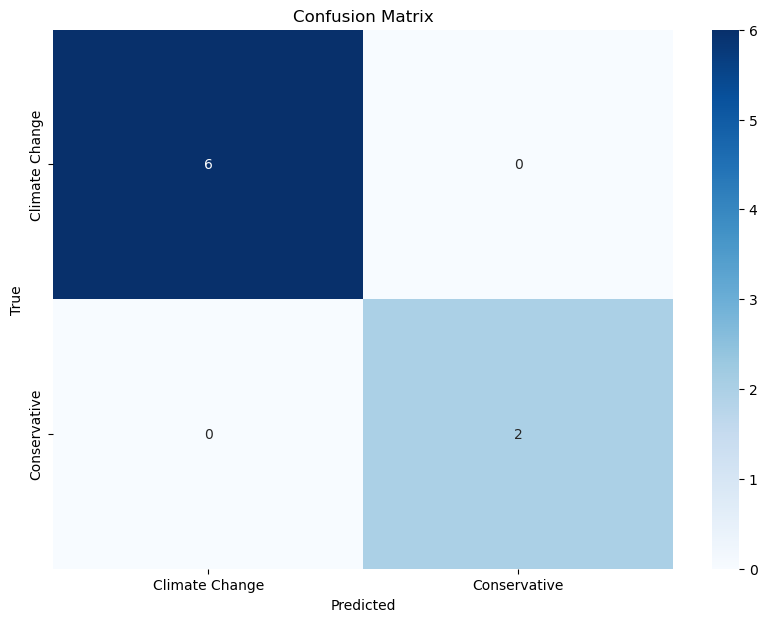

label
positive    20
negative    20
Name: count, dtype: int64
Top 10 features:
renewable energy: 0.4018
future: 0.4018
renewable: 0.4018
future act: 0.4018
act climate: 0.4018
energy future: 0.4018
act: 0.4018
recognizing: 0.3787
love people: 0.3787
finally: 0.3787


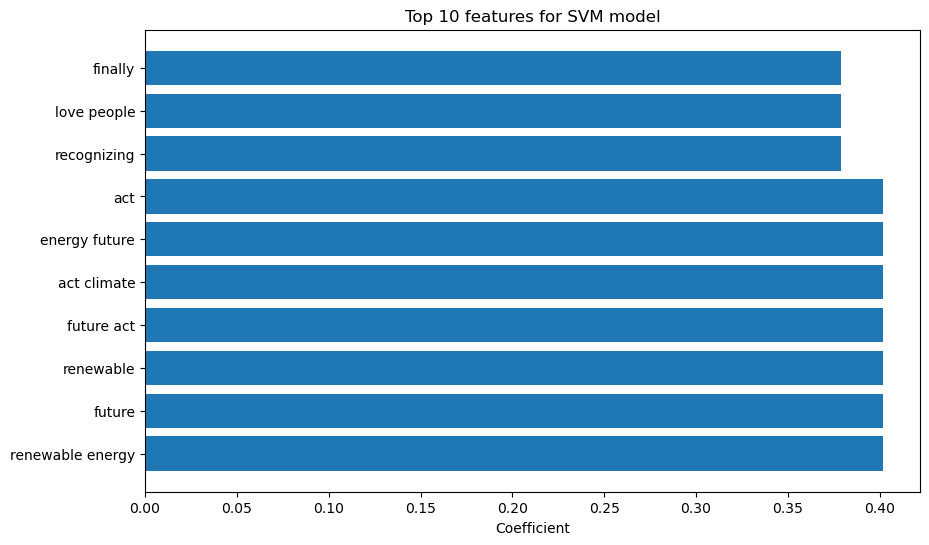

In [22]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a SVM classifier
svm = SVC(
    kernel='linear',  
    C=1.0,           
    gamma='scale',    
)
# Train the classifier
svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)   
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Climate Change', 'Conservative'], yticklabels=['Climate Change', 'Conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(y.value_counts())

# Most informative features

# Get the feature names
feature_names = vectorizer.get_feature_names_out()
# Get the coefficients of the SVM model
coefs = svm.coef_.toarray().flatten()
# Get the indices of the top 10 features
top_n = 10
top_n_indices = np.argsort(coefs)[-top_n:]
# Get the top n features and their coefficients
top_n_features = [(feature_names[i], coefs[i]) for i in top_n_indices]
# Sort the features by their coefficients
top_n_features = sorted(top_n_features, key=lambda x: x[1], reverse=True)
# Print the top n features
print("Top {} features:".format(top_n))
for feature, coef in top_n_features:
    print("{}: {:.4f}".format(feature, coef))
# Plot the top n features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), [coef for _, coef in top_n_features], align='center')
plt.yticks(range(top_n), [feature for feature, _ in top_n_features])
plt.xlabel('Coefficient')
plt.title('Top {} features for SVM model'.format(top_n))
plt.show()
# Save the model
